In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('earthquake_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 18 columns):
Date                 23412 non-null object
Time                 23412 non-null object
Latitude             23412 non-null float64
Longitude            23412 non-null float64
Type                 23412 non-null object
Depth                23412 non-null float64
Magnitude            23412 non-null float64
NormalizedLat        23412 non-null float64
NormalizedLong       23412 non-null float64
NormalizedDepth      23412 non-null float64
NormalizedMag        23412 non-null float64
Unnamed: 11          0 non-null float64
Unnamed: 12          0 non-null float64
Unnamed: 13          2 non-null object
Latitude_max_min     2 non-null float64
Longitude_max_min    2 non-null float64
Depth_max_min        2 non-null float64
Magnitude_max_min    2 non-null float64
dtypes: float64(14), object(4)
memory usage: 3.2+ MB


In [4]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,NormalizedLat,NormalizedLong,NormalizedDepth,NormalizedMag,Unnamed: 11,Unnamed: 12,Unnamed: 13,Latitude_max_min,Longitude_max_min,Depth_max_min,Magnitude_max_min
0,23744.00,0.5724,19.246,145.616,Earthquake,131.6,6.0,0.590649,0.904493,0.189274,0.138889,NaN,NaN,min,-77.080,-179.997,-1.1,5.5
1,23746.00,0.4790,1.863,127.352,Earthquake,80.0,5.8,0.484060,0.853759,0.115675,0.083333,NaN,NaN,max,86.005,179.998,700.0,9.1
2,23747.00,0.7541,-20.579,-173.972,Earthquake,20.0,6.2,0.346451,0.016736,0.030096,0.194444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23750.00,0.7845,-59.076,-23.557,Earthquake,15.0,5.8,0.110396,0.434562,0.022964,0.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23751.00,0.5645,11.938,126.427,Earthquake,15.0,5.8,0.545838,0.851190,0.022964,0.083333,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['Type'].unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'], dtype=object)

In [6]:
x = np.array(df[['Latitude','Longitude','Depth']])
y = np.array(df[['Magnitude']])

In [7]:
x_norm = (x-np.amin(x,0))/(np.amax(x,0)-np.amin(x,0))

In [8]:
num_samples = len(x_norm)
np.random.seed(0)
num_features = x_norm.shape[1]
num_output = y.shape[1]

In [9]:
# Split vectors into train / eval sets
index = np.arange(num_samples)
np.random.shuffle(index)
train_end = int(0.7* num_samples)
validate_end = int(0.2 * num_samples) + train_end
trainX, trainY = x_norm[index[:train_end]], y[index[:train_end]]
validX, validY = x_norm[index[train_end:validate_end]], y[index[train_end:validate_end]]
testX, testY = x_norm[index[validate_end:]], y[index[validate_end:]]

In [10]:
n_nodes_hl1 = 20
n_nodes_hl2 = 20

batch_size = 100 # batches of features feed to network

x = tf.placeholder('float', [None, num_features])
y = tf.placeholder('float')

In [11]:
def neural_network_model(data):
    hidden_1_layer = {'weights':tf.Variable(tf.random_normal([num_features, n_nodes_hl1])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl1]))}

    hidden_2_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases':tf.Variable(tf.random_normal([n_nodes_hl2]))}

    output_layer = {'weights':tf.Variable(tf.random_normal([n_nodes_hl2, num_output])),
                    'biases':tf.Variable(tf.random_normal([num_output])),}

 	# (input_data * weights) + biases

    l1 = tf.add(tf.matmul(data,hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    output = tf.matmul(l2,output_layer['weights']) + output_layer['biases']

    return output

 Intial Training loss: [160.13422]
Epoch: 1 Training loss: [107.91811] Validation loss: [106.63245]
Epoch: 2 Training loss: [78.160492] Validation loss: [78.064529]
Epoch: 3 Training loss: [67.54615] Validation loss: [68.28743]
Epoch: 4 Training loss: [68.360725] Validation loss: [69.597618]
Epoch: 5 Training loss: [72.051285] Validation loss: [73.519363]
Epoch: 6 Training loss: [73.049614] Validation loss: [74.570259]
Epoch: 7 Training loss: [69.781288] Validation loss: [71.248695]
Epoch: 8 Training loss: [63.098755] Validation loss: [64.451538]
Epoch: 9 Training loss: [54.743946] Validation loss: [55.934326]
Epoch: 10 Training loss: [46.42004] Validation loss: [47.418095]
Epoch: 11 Training loss: [39.493938] Validation loss: [40.272404]
Epoch: 12 Training loss: [34.637306] Validation loss: [35.194172]
Epoch: 13 Training loss: [31.777563] Validation loss: [32.130737]
Epoch: 14 Training loss: [30.308392] Validation loss: [30.482786]
Epoch: 15 Training loss: [29.357605] Validation loss:

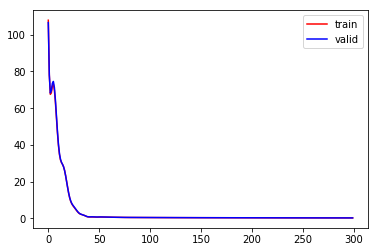

In [21]:
prediction = neural_network_model(x)
Loss =  tf.reduce_mean(tf.square(y-prediction))
optimizer = tf.train.AdamOptimizer(0.01).minimize(Loss)
#optimizer = tf.train.AdagradOptimizer(0.01).minimize(Loss)
#optimizer = tf.train.MomentumOptimizer(learning_rate,0.01).minimize(Loss)
#optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(Loss)
#Operation to save variables
saver = tf.train.Saver()

epoch = 300
train = []
valid = []
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    print(" Intial Training loss:",sess.run([Loss],feed_dict={x:trainX,y:trainY}))
    for i in range(epoch):
        sess.run([optimizer],feed_dict={x:trainX,y:trainY})
        train_loss = sess.run([Loss],feed_dict={x:trainX,y:trainY})
        valid_loss = sess.run([Loss],feed_dict={x:validX,y:validY})
        train += [train_loss]
        valid += [valid_loss]  
        print("Epoch:",i+1,"Training loss:",train_loss,"Validation loss:",valid_loss)
    
    plt.figure()
    plt.plot(np.arange(len(train)),train,'r',valid,'b')
    plt.legend(['train','valid'])
    
    # Save the variables to disk.
    save_path = saver.save(sess, "/tmp/earthquake_model.ckpt")
    print("Model saved in file: %s" % save_path)

In [22]:
with tf.Session() as sess:
    # Restore variables from disk for validation.
    saver.restore(sess, "/tmp/earthquake_model.ckpt")
    print("Model restored.")
    #print("Final validation loss:",sess.run([mean_square],feed_dict={X:InputX1v,Y:InputY1v}))
    print("Test:",sess.run([prediction],feed_dict={x:testX}))
    print("Test Loss:",sess.run([Loss],feed_dict={x:testX,y:testY}))

Model restored.
Test: [array([[ 5.89184475],
       [ 5.2868433 ],
       [ 5.87542343],
       ..., 
       [ 5.87458277],
       [ 5.92343426],
       [ 5.77965069]], dtype=float32)]
Test Loss: [0.24450813]
